In [68]:
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
from pathlib import Path

In [2]:
#function for showing volume images
def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [3]:
data = pd.read_csv('C://Image Processing/brats data/MICCAI_BraTS_2018_Data_Training/survival_data.csv')
data.head(10)

,BraTS18ID,Age,Survival,ResectionStatus
0,Brats18_TCIA08_167_1,74.907,153,NaN
1,Brats18_TCIA08_242_1,66.479,147,NaN
2,Brats18_TCIA08_319_1,64.860,254,NaN
3,Brats18_TCIA08_469_1,63.899,519,NaN
4,Brats18_TCIA08_218_1,57.345,346,NaN
5,Brats18_TCIA08_406_1,78.745,82,NaN
6,Brats18_TCIA08_280_1,57.362,508,NaN
7,Brats18_TCIA08_105_1,66.627,77,NaN
8,Brats18_TCIA08_278_1,50.501,1458,NaN
9,Brats18_TCIA06_247_1,76.699,244,NaN


In [4]:
data.loc[data.Age<35]

,BraTS18ID,Age,Survival,ResectionStatus
34,Brats18_TCIA03_121_1,30.408,747,NaN
72,Brats18_TCIA01_186_1,33.888,370,NaN
73,Brats18_TCIA01_460_1,18.975,630,NaN
76,Brats18_2013_11_1,29.120,150,GTR
92,Brats18_CBICA_AXJ_1,27.811,1767,GTR


In [83]:
#making separate directories for different modalities in order
path = 'C://Image Processing/brats data/MICCAI_BraTS_2018_Data_Training/'
path_HGG = 'C://Image Processing/brats data/new/HGG/'
path_LGG = 'C://Image Processing/brats data/new/LGG/'
list_of_dirs = ['t1','T1Gd','t2','flair']

def make_my_dirs(directory, names):
    for i in names: 
        os.makedirs(directory+i, exist_ok = True)

make_my_dirs(path_HGG, list_of_dirs)
make_my_dirs(path_LGG, list_of_dirs)

In [120]:
#creating lists with images of different modalities

common_list = []
t2_list = []
t1_list = []
t1ce_list = []
flair_list = []
for (dirpath, dirnames, filenames) in os.walk('C://Image Processing/brats data/MICCAI_BraTS_2018_Data_Training/'):
    for filename in filenames: 
        if filename.endswith('csv')==False and 'seg' not in filename.split('.')[0]:
            if 't2' in filename.split('.')[0]: 
                t2_list.append(os.path.join(dirpath,filename))
            elif 't1' in filename.split('.')[0] and 't1ce' not in filename.split('.')[0]:
                t1_list.append(os.path.join(dirpath,filename))
            elif 't1ce' in filename.split('.')[0]:
                t1ce_list.append(os.path.join(dirpath,filename))
            elif 'flair' in filename.split('.')[0]:
                flair_list.append(os.path.join(dirpath,filename))

In [110]:
def plot_spacing(l):
    ''' 

    this function helps to plot spacing histograms 
    
    l = list with files` paths 


    '''    
    temp_list=[]
    
    for image in l:
        image_read=sitk.ReadImage(image)
        value=list(image_read.GetSpacing())
        value = [round(i,2) for i in value ]
        temp_list.append((str(value)).strip('[]'))

    
    temp_df=pd.DataFrame(temp_list)
    
    
    plt.figure(figsize=(12,7))
    plt.suptitle('Pixel Spacing (x,y,z) for',fontsize=20)
    ax=temp_df[0].value_counts().plot(kind='bar')
    ax.set_xlabel('pixel spacing (x,y,z) in mm',fontsize='large')
    ax.set_ylabel('patients count',fontsize='large')
    plt.show()



def plot_size(l):
    '''
    this function helps to plot size histograms 
    
    l = list with files` paths
    '''
    temp_list=[]
    
    for image in l:
        image_read=sitk.ReadImage(image)
        value=list(image_read.GetSize())
        value = [round(i,2) for i in value ]
        temp_list.append((str(value)).strip('[]'))

    
    temp_df=pd.DataFrame(temp_list)
    
    
    plt.figure(figsize=(12,7))
    plt.suptitle('Size for',fontsize=20)
    ax=temp_df[0].value_counts().plot(kind='bar')
    ax.set_xlabel('Size ',fontsize='large')
    ax.set_ylabel('patients count',fontsize='large')
    plt.show()

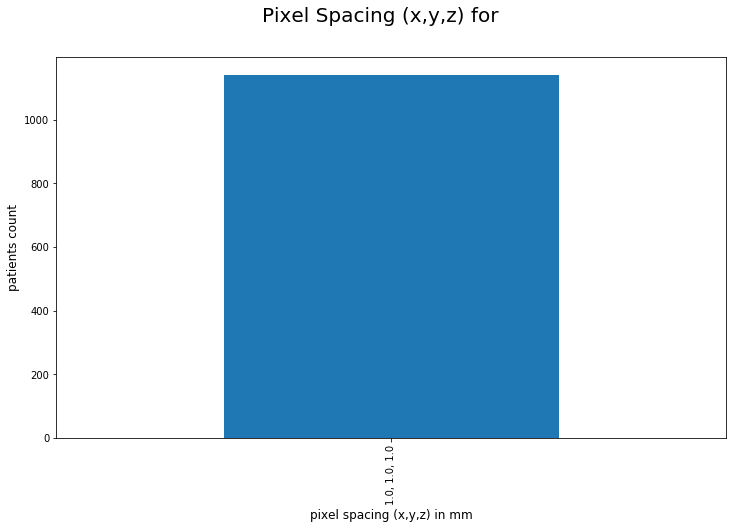

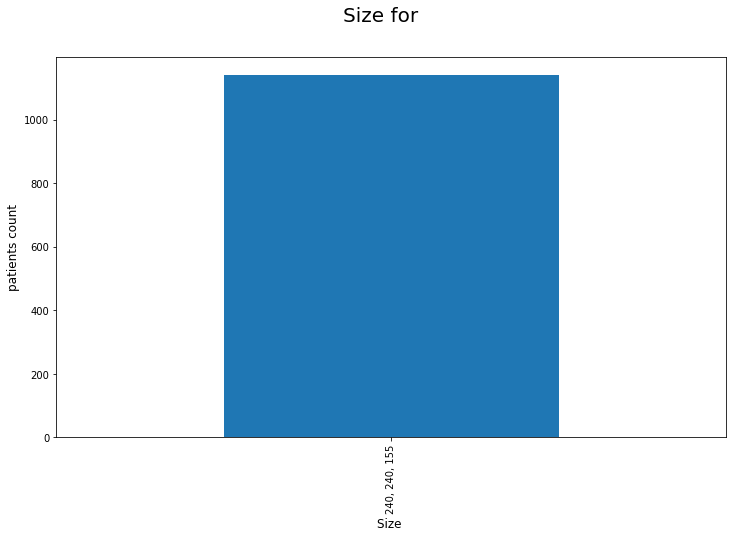

In [111]:
plot_spacing(common_list)
plot_size(common_list)

In [112]:
#lists of paths for all modalities
im1 = sitk.ReadImage(common_list[0])
im_arr_1 = sitk.GetArrayFromImage(im1)

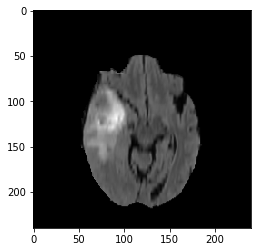

In [142]:
myshow(im_arr_1, 62)